In [ ]:
from sarxarray.utils import complex_coherence
import xarray as xr

In [2]:
from scipy.special import hyp2f1
def coherence_pdf(y, L):
    """
    D = degree of coherence
    d = D_hat
    Touzi and Lopes 1996, Touzi et al 1997

    Equation 61 of Rosen et al. 2000

    L > 2
    y != 1
    """
    return 2* (L - 1) * (1 - y**2)**(L) * y * (1 - y**2)**(L-2) * hyp2f1(L, L, 1, y**2*y**2)

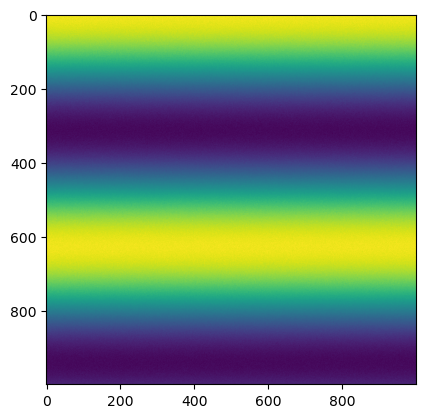

In [215]:
plt.imshow((np.cos(0.00001*np.arange(n)) + 0.1*np.random.random(n)).reshape(shapex, shapey))


In [284]:
n = 1000000
shapex, shapey = int(n**0.5), int(n**0.5)
arr1= np.cos(0.0001*np.arange(n)) + 5*np.random.random(n) #+ np.cos(0.00001 * np.arange(n))
arr1= arr1.reshape(shapex, shapey)
# arr1 = arr1 + np.cos(0.0001*np.arange(n)).reshape(shapex, shapey).T
arr1 = np.random.random(n).reshape(shapex, shapey) + arr1*1j
arr1 = arr1/np.mean(arr1)
# arr2= (np.cos(0.0001*np.arange(n)) + 1*np.random.random(n)).reshape(shapex, shapey)
# arr2[int(shapex/2):] = arr2[int(shapex/2):] + 10*np.random.random(int(shapex/2*shapey)).reshape(int(shapex/2), shapey)
# arr2[int(shapex/2):, int(shapey/2):] = arr2[int(shapex/2):, int(shapey/2):] + 100*np.random.random(int(shapex/2*shapey/2)).reshape(int(shapex/2), int(shapey/2))
arr2= np.random.random(n).reshape(shapex, shapey) * 3 + arr2*1j
arr2 = arr2/np.mean(arr2)
da1 = xr.DataArray(arr1.astype(np.complex64), dims = ['azimuth','range'])
da2 = xr.DataArray(arr2.astype(np.complex64), dims = ['azimuth','range'])
phase = da1 * da2.conj()
phase = np.rad2deg(np.arctan2(phase.real, phase.imag))


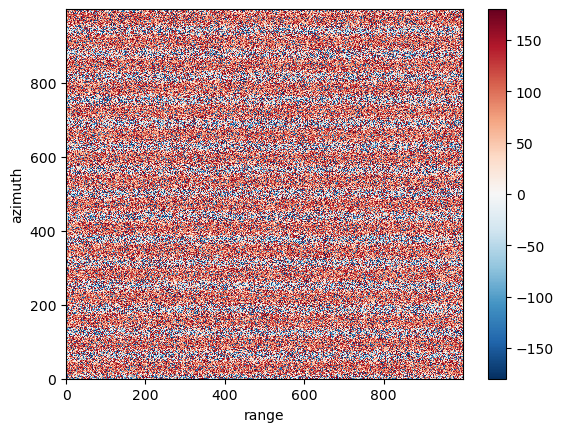

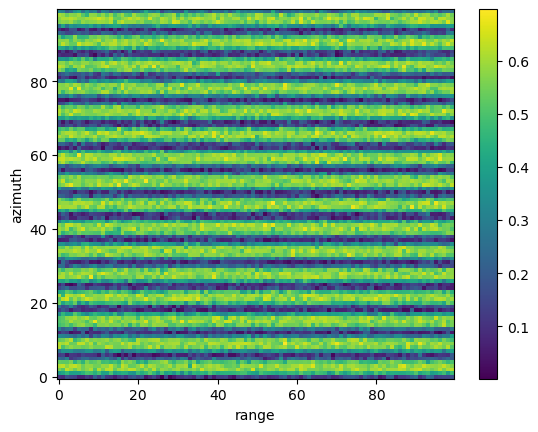

In [285]:
phase.plot()
plt.show()
complex_coherence(da1, da2, (10, 10)).plot()

In [266]:
cmap = plt.cm.get_cmap('Greens')

/tmp/ipykernel_7565/2374691001.py:1: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('Greens')


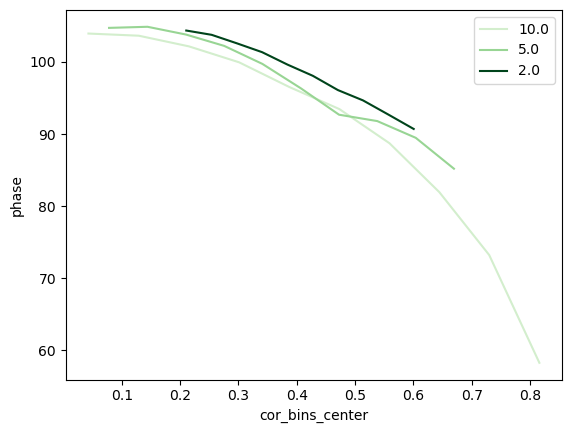

In [305]:
cor = complex_coherence(da1, da2, (5, 5))
phase = da1 * da2.conj()
phase = np.rad2deg(np.arctan2(phase.real, phase.imag))

for looks in [1, 2, 5]:
    phase_coarsen = phase.coarsen(azimuth = int(5 *looks), range = int(5*looks)).std()
    # cor_coarsen = xr.DataArray(np.repeat(np.repeat(a = cor.values, repeats=looks, axis = 1), looks, 0), dims= ['azimuth', 'range'])
    cor_coarsen = cor.coarsen(azimuth = looks, range = looks).mean()
    # cor_coarsen = complex_coherence(da1, da2, (looks, looks))

    # phase_coarsen.plot()
    # plt.show()
    # cor_coarsen.plot()
    # plt.show()
    ds = xr.merge([cor_coarsen.rename('cor'), phase_coarsen.rename('phase')])
    ds.groupby_bins('cor', bins = 10).mean()['phase'].plot(label = 10 /looks, color = cmap(looks/5))
plt.legend()

2
4
5
10
20


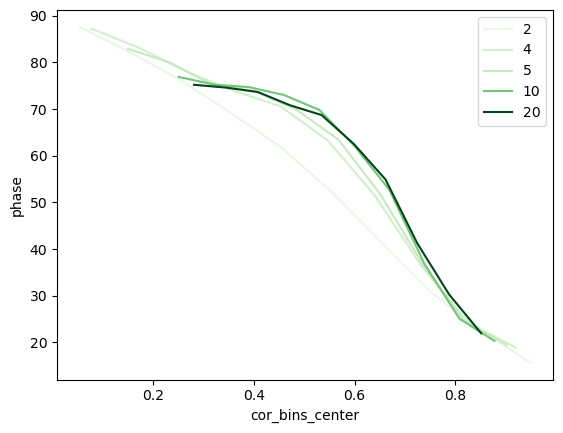

In [254]:
# phase = da1 * da2.conj()
# looks = 1
# cor = complex_coherence(da1, da2, (1, 1))
# ds = xr.merge([xr.DataArray(np.repeat(np.repeat(a = cor.values, repeats=looks, axis = 1), looks, 0), dims= ['azimuth', 'range']).rename('cor'), phase.rename('phase')])
# ds.groupby_bins('cor', bins = 10).std()['phase'].plot(label = looks)

for looks in [2,4,5,10, 20]:
    print(looks)
    phase = da1 * da2.conj()
    phase = np.rad2deg(np.arctan2(phase.real, phase.imag))

    cor = complex_coherence(da1, da2, (looks, looks))
    # ds = xr.merge([xr.DataArray(np.repeat(np.repeat(a = cor.values, repeats=looks, axis = 1), looks, 0), dims= ['azimuth', 'range']).rename('cor'), phase.rename('phase')])
    phase_coarse = phase.coarsen(azimuth = looks, range = looks).std()#.coarsen(range = looks).std()
    # phase.plot()
    # plt.show()
    # cor.plot()
    # plt.show()
    ds = xr.merge([cor.rename('cor'), phase_coarse.rename('phase')])
    ds.groupby_bins('cor', bins = 10).mean()['phase'].plot(label = looks, color = cmap(looks/20))
plt.legend()
